# [Mobile Games A/B Testing - Cookie Cats](https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats)

## 프로젝트 개요

-   **게임 소개: Cookie Cats**

    [Cookie Cats](https://tactilegames.com/games/cookie-cats/)는 [Tactile Entertainment](https://tactilegames.com/)에서 개발한 클래식한 퍼즐 게임으로, 같은 색상의 블록을 맞추는 방식으로 진행됩니다. 모바일 플랫폼에서 제공되며, 플레이어가 점점 더 어려워지는 레벨을 해결해 나가는 게임.

    -   개발사: [Tactile Entertainment](https://tactilegames.com/)

    -   장르: 퍼즐 게임

    -   플랫폼: 모바일

-   **프로젝트의 목표**

    First Gate의 위치를 레벨 30에서 레벨 40으로의 변경이 플레이어의 게임 진행, 게임 이탈률 등에 어떤 영향을 미치는지 분석.

-   **First Gate**

    게임에서 플레이어의 진행을 일시적으로 막는 첫 장벽.

    일반적으로 많은 온라인 게임에서는 특정 구간에서 게임 진행 속도를 조절하거나, 플레이어의 과금 유도를 위해 여러 방식을 활용.

    이 게임에서는 특정 레벨에 도달하면 나타나며, 플레이어는 이 장벽을 통과하기 위해 시간을 기다리거나 유료 아이템을 사용해야함.

-   **A/B 테스트**

    이 프로젝트에서는 A/B 테스트를 활용하여 두 그룹을 비교 분석

    -   대조군(A): First Gate가 레벨 30에 위치한 그룹.

    -   실험군(B): First Gate가 레벨 40으로 이동한 그룹.

-   **데이터 셋**
    데이터는 A/B 테스트가 진행되는 동안 게임을 설치한 90,189명의 플레이어로부터 얻은 것.
    플레이어가 게임을 설치하면 무작위로 둘 중 하나에 배정되었음.
    | 행 이름 | 설명 |
    | -------------- | ----------------------------------------------------------------------- |
    | userid | 각 플레이어를 식별하는 고유 번호 |
    | version | 플레이어가 배정된 그룹을 나타냄 <br> (대조군: gate_30, 실험군: gate_40) |
    | sum_gamerounds | 설치 후 첫 14일 동안 플레이어가 플레이한 게임 라운드의 수 |
    | retention_1 | Boolean. 플레이어가 설치 1일 후에 돌아와서 플레이했는지 여부 |
    | retention_7 | Boolean. 플레이어가 설치 7일 후에 돌아와서 플레이했는지 여부 |


## Import & Load


In [158]:
import warnings
from types import SimpleNamespace

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2, chi2_contingency

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False


def df_var(df, namespace=False) -> SimpleNamespace | dict:
    var = {}
    var["categorical_columns"] = df.select_dtypes(
        include=["object", "category"]
    ).columns.to_list()
    var["numeric_columns"] = df.select_dtypes(include="number").columns.to_list()
    if namespace:
        var = SimpleNamespace(**var)
    return var


def display_or_print(a):
    try:
        display(a)
    except:
        print(a)


def eda(df):
    print("────────────────────  df.shape  ────────────────────")
    print(df.shape)
    print()

    print("────────────────────  df.info()  ────────────────────")
    df.info()
    print()

    print("────────────────────  df.head(5)  ────────────────────")
    display_or_print(df.head(5))
    print()

    print("────────────────────  df.describe()  ────────────────────")
    display_or_print(df.describe())
    print()

    print(
        "────────────────────  df.describe(include=['object', 'category'])  ────────────────────"
    )
    display_or_print(df.describe(include=["object", "category"]))
    print()

    print("────────────────────  df.isna().sum()  ────────────────────")
    display_or_print(df.isna().sum())

    if df.select_dtypes(include="number").columns.to_list():
        print()

        print("────────────────────  (df == 0).sum()  ────────────────────")
        display_or_print((df == 0).sum())
        print()

        print("────────────────────  (df == -1).sum()  ────────────────────")
        display_or_print((df == -1).sum())








warnings.filterwarnings("ignore")

path = {
    "data": r"./kaggle/input/mobile-games-ab-testing-cookie-cats/cookie_cats.csv",
}

df = pd.read_csv(path["data"])

## 데이터 탐색


In [159]:
eda(df)

────────────────────  df.shape  ────────────────────
(90189, 5)

────────────────────  df.info()  ────────────────────
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB

────────────────────  df.head(5)  ────────────────────


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True



────────────────────  df.describe()  ────────────────────


,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000



────────────────────  df.describe(include=['object', 'category'])  ────────────────────


,version
count,90189
unique,2
top,gate_40
freq,45489



────────────────────  df.isna().sum()  ────────────────────


userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64


────────────────────  (df == 0).sum()  ────────────────────


userid                0
version               0
sum_gamerounds     3994
retention_1       50036
retention_7       73408
dtype: int64


────────────────────  (df == -1).sum()  ────────────────────


userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

데이터는 5개의 행과 90189개의 열로 이루어짐. 결측치 없는 없는 것으로 보이고, sum_gamerounds, retention_1, retention_7 컬럼을 위주로 EDA하면 될 것으로 보임.


### `retention_1`


In [160]:
df.groupby("version")["retention_1"].agg(["mean", "sum", "count"])

,mean,sum,count
version,,,
gate_30,0.448188,20034,44700
gate_40,0.442283,20119,45489


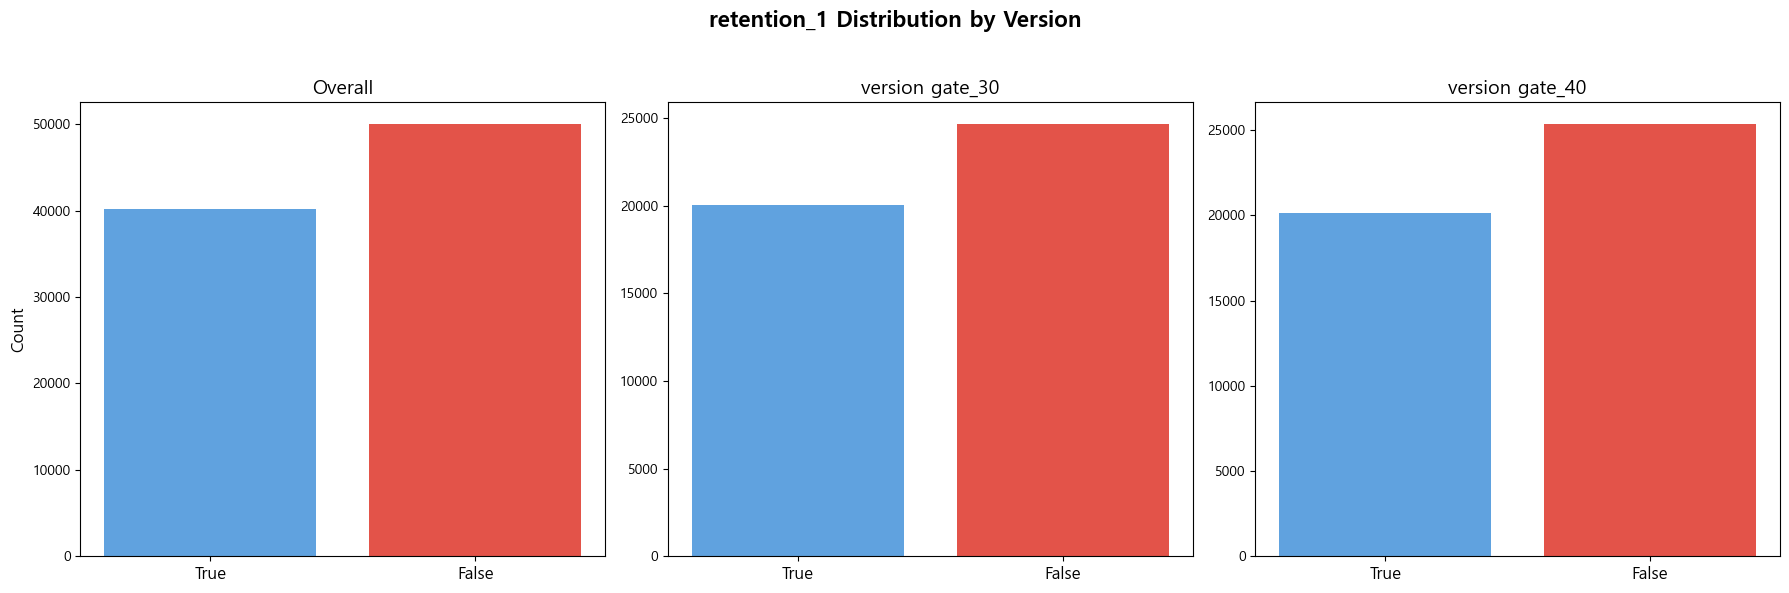

In [161]:
bar(df, "retention_1")

### `retention_7`


In [162]:
df.groupby("version")["retention_7"].agg(["mean", "sum", "count"])

,mean,sum,count
version,,,
gate_30,0.190201,8502,44700
gate_40,0.182000,8279,45489


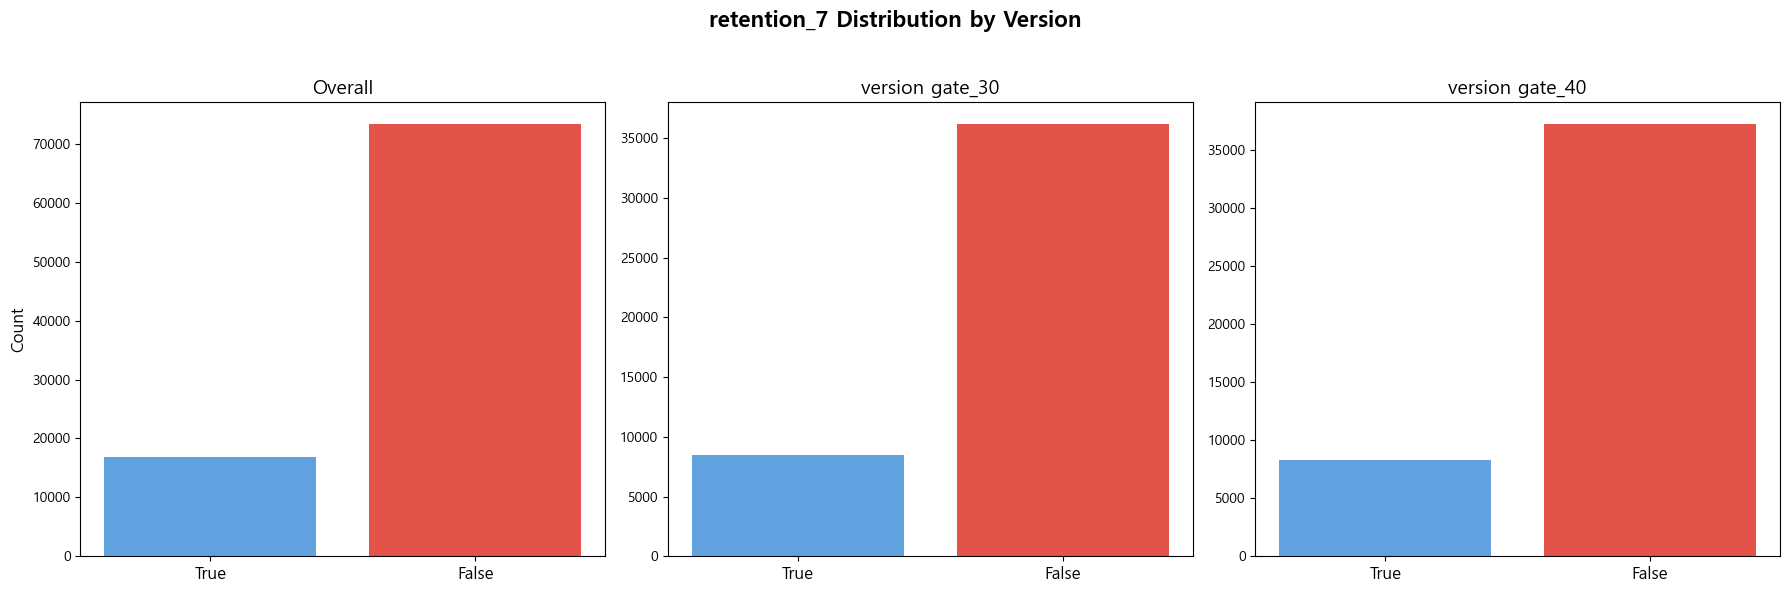

In [163]:
bar(df, "retention_7")

두 버전 사이에 큰 차이는 없는 것으로 보이지만, <u>미미하게 gate_30이 유저 이탈이 더 적은 것</u>으로 보임.


### `sum_gamerounds`


In [164]:
df["sum_gamerounds"].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [165]:
df[df["version"] == "gate_30"]["sum_gamerounds"].describe()

count    44700.000000
mean        52.456264
std        256.716423
min          0.000000
25%          5.000000
50%         17.000000
75%         50.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [166]:
df[df["version"] == "gate_40"]["sum_gamerounds"].describe()

count    45489.000000
mean        51.298776
std        103.294416
min          0.000000
25%          5.000000
50%         16.000000
75%         52.000000
max       2640.000000
Name: sum_gamerounds, dtype: float64

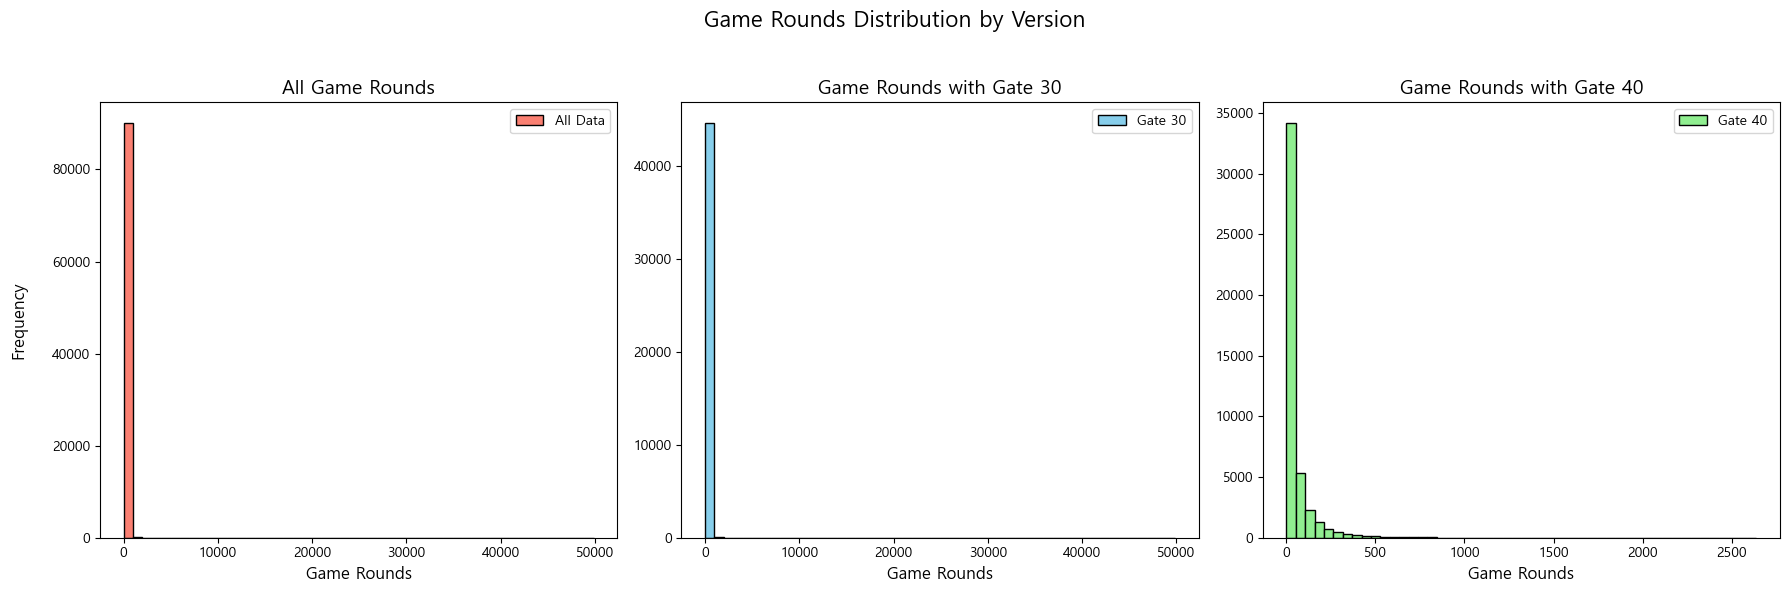

In [167]:
def hist(df, bin=50, add_overlaid=False):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle("Game Rounds Distribution by Version", fontsize=16)  # 전체 제목 설정

    # 전체 데이터 히스토그램
    axes[0].hist(
        df["sum_gamerounds"],
        bins=bin,
        color="salmon",
        edgecolor="black",
        label="All Data",
    )

    axes[0].set_title("All Game Rounds", fontsize=14)
    axes[0].set_xlabel("Game Rounds", fontsize=12)
    axes[0].set_ylabel("Frequency\n", fontsize=12)
    axes[0].legend()

    # gate_30 버전의 히스토그램
    axes[1].hist(
        df[df["version"] == "gate_30"]["sum_gamerounds"],
        bins=bin,
        color="skyblue",
        edgecolor="black",
        label="Gate 30",
    )

    axes[1].set_title("Game Rounds with Gate 30", fontsize=14)
    axes[1].set_xlabel("Game Rounds", fontsize=12)
    axes[1].legend()

    # gate_40 버전의 히스토그램
    axes[2].hist(
        df[df["version"] == "gate_40"]["sum_gamerounds"],
        bins=bin,
        color="lightgreen",
        edgecolor="black",
        label="Gate 40",
    )

    axes[2].set_title("Game Rounds with Gate 40", fontsize=14)
    axes[2].set_xlabel("Game Rounds", fontsize=12)
    axes[2].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # 전체 제목과의 간격 확보
    plt.show()


hist(df)

최소값이 0이고 백분위 25%는 5, 50%는 16인데, 본 프로젝트에서 첫 게이트가 30인 경우와 40인 경우인데, 대부분의 데이터에서는 비교하기 적절하지 않을 것으로 보임. `sum_gamerounds`값이 30보다 낮은 행 제거를 고려할 수 있음.

<u>이상치가 있는 것으로 보임.</u> 특히, 57702행의 경우, `sum_gamerounds`값이 49854로 매우 차이가 많이 남. 이외에도 높은 값들이 있을 것으로 보여, 이상치를 탐색해보고 제거하는 것을 고려할 수 있음.


In [168]:
df["sum_gamerounds"].sort_values(ascending=False).head(10)

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
46344     2251
87007     2156
36933     2124
88328     2063
6536      2015
Name: sum_gamerounds, dtype: int64

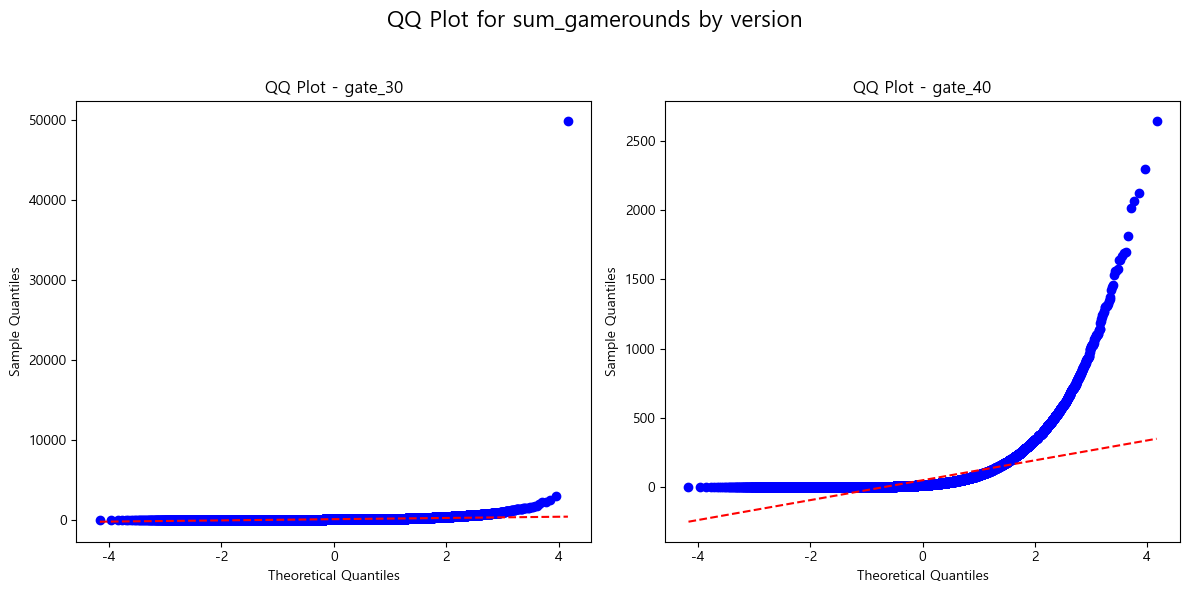

In [169]:
import scipy.stats as stats


def plot_qq_by_version(df, column, version_col="version"):

    group1, group2 = df[version_col].unique()
    data1 = df[df[version_col] == group1][column].dropna()
    data2 = df[df[version_col] == group2][column].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"QQ Plot for {column} by {version_col}", fontsize=16)

    stats.probplot(data1, dist="norm", plot=axes[0])
    axes[0].get_lines()[1].set_color("red")
    axes[0].get_lines()[1].set_linestyle("--")
    axes[0].set_title(f"QQ Plot - {group1}")
    axes[0].set_xlabel("Theoretical Quantiles")
    axes[0].set_ylabel("Sample Quantiles")

    # 두 번째 그룹 QQ 플롯
    stats.probplot(data2, dist="norm", plot=axes[1])
    axes[1].get_lines()[1].set_color("red")
    axes[1].get_lines()[1].set_linestyle("--")
    axes[1].set_title(f"QQ Plot - {group2}")
    axes[1].set_xlabel("Theoretical Quantiles")
    axes[1].set_ylabel("Sample Quantiles")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


plot_qq_by_version(df, "sum_gamerounds")

## 전처리

-   **조기 이탈 플레이어 데이터 제외.**

    플레이어가 게이트를 도달하기 전에 이탈하였으므로 `sum_gamerounds` 행이 30미만인 열 제외.

-   **57702 열 제외.**

    57702 열은 `sum_gamerounds` 의 값이 49854으로 매우 높음. 그 다음으로 높은 열의 경우 2961. 너무 높아 제외.

-   **IQR을 기준으로 이상치를 탐지 및 제거.**

    1. Q1(1사분위수)에서 IQR의 1.5배를 뺀 값을 최솟값으로 설정.

    2. Q3(3사분위수)에서 IQR의 1.5배를 더한 값을 최댓값으로 설정.

    3. 이 최솟값과 최댓값의 범위를 벗어나는 데이터를 이상치로 간주하고 제거.


In [170]:
len(df[df["sum_gamerounds"] < 30])

56920

In [171]:
df_preped = df[df["sum_gamerounds"] >= 30]
df_preped.shape

(33269, 5)

In [172]:
df_preped = df_preped.drop(57702)
df_preped.shape

(33268, 5)

In [173]:
def get_outlier(df, column, weight=1.5, drop=False):
    if df is None or column not in df:
        raise ValueError("유효한 데이터프레임 및 열 이름을 제공해야 합니다.")
    if weight <= 0:
        raise ValueError("가중치(weight)는 0보다 커야 합니다.")

    Q1 = np.percentile(df[column].dropna(), 25)
    Q3 = np.percentile(df[column].dropna(), 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - weight * IQR
    upper_bound = Q3 + weight * IQR
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

    print("Q1, Q3, IQR:", Q1, Q3, IQR)
    print("lower_bound, upper_bound:", lower_bound, upper_bound)

    if drop:
        print("df.shape before", df.shape)
        result = df.drop(outlier_indices, axis=0)
        print("df.shape after", result.shape)
        return result
    return list(outlier_indices)


df_preped = get_outlier(df=df_preped, column="sum_gamerounds", weight=1.5, drop=True)

Q1, Q3, IQR: 45.0 144.0 99.0
lower_bound, upper_bound: -103.5 292.5
df.shape before (33268, 5)
df.shape after (30446, 5)


## 전처리 후 데이터 탐색


In [174]:
eda(df_preped)

────────────────────  df.shape  ────────────────────
(30446, 5)

────────────────────  df.info()  ────────────────────
<class 'pandas.core.frame.DataFrame'>
Index: 30446 entries, 1 to 90187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          30446 non-null  int64 
 1   version         30446 non-null  object
 2   sum_gamerounds  30446 non-null  int64 
 3   retention_1     30446 non-null  bool  
 4   retention_7     30446 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 1010.9+ KB

────────────────────  df.head(5)  ────────────────────


,userid,version,sum_gamerounds,retention_1,retention_7
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
8,1574,gate_40,108,True,True



────────────────────  df.describe()  ────────────────────


,userid,sum_gamerounds
count,3.044600e+04,30446.000000
mean,4.999598e+06,89.906556
std,2.877565e+06,61.266019
min,3.370000e+02,30.000000
25%,2.521380e+06,43.000000
50%,4.977836e+06,67.000000
75%,7.485034e+06,118.000000
max,9.999768e+06,292.000000



────────────────────  df.describe(include=['object', 'category'])  ────────────────────


,version
count,30446
unique,2
top,gate_30
freq,15236



────────────────────  df.isna().sum()  ────────────────────


userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64


────────────────────  (df == 0).sum()  ────────────────────


userid                0
version               0
sum_gamerounds        0
retention_1        6457
retention_7       18549
dtype: int64


────────────────────  (df == -1).sum()  ────────────────────


userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### `retention_1` & `retention_7`


In [175]:
df_preped.groupby("version")["retention_1"].agg(["mean", "sum", "count"])

,mean,sum,count
version,,,
gate_30,0.787608,12000,15236
gate_40,0.788231,11989,15210


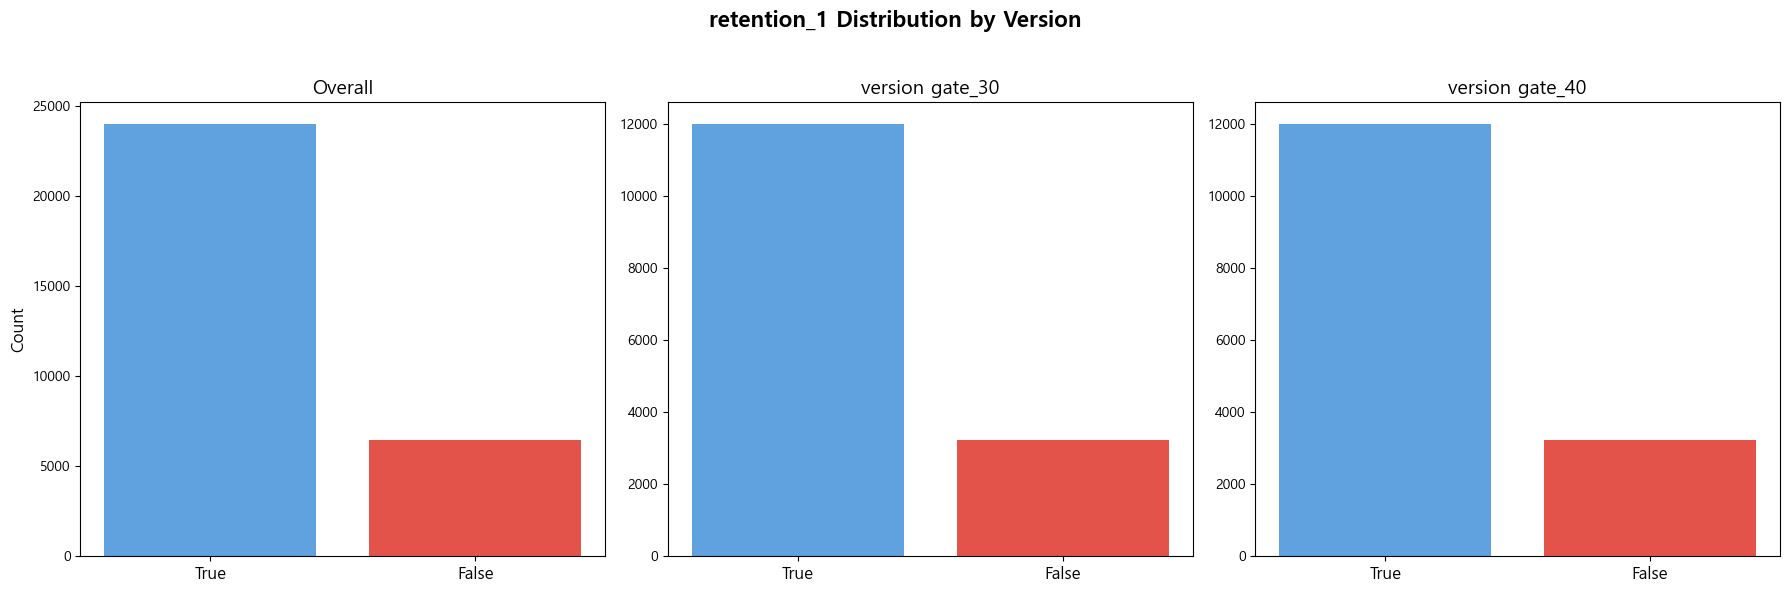

In [176]:
def bar(df, col="retention_1"):

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"{col} Distribution by Version", fontsize=16, fontweight="bold")
    true_count = df[col].sum()
    false_count = len(df) - true_count
    axes[0].bar(
        ["True", "False"], [true_count, false_count], color=["#60a2df", "#e35349"]
    )
    axes[0].set_title("Overall", fontsize=14)
    axes[0].set_ylabel("Count", fontsize=12)
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(["True", "False"], fontsize=12)
    true_count = df[df["version"] == "gate_30"][col].sum()
    false_count = len(df[df["version"] == "gate_30"]) - true_count
    axes[1].bar(
        ["True", "False"], [true_count, false_count], color=["#60a2df", "#e35349"]
    )

    axes[1].set_title("version gate_30", fontsize=14)
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(["True", "False"], fontsize=12)
    true_count = df[df["version"] == "gate_40"][col].sum()
    false_count = len(df[df["version"] == "gate_40"]) - true_count
    axes[2].bar(
        ["True", "False"], [true_count, false_count], color=["#60a2df", "#e35349"]
    )
    axes[2].set_title("version gate_40", fontsize=14)
    axes[2].set_xticks([0, 1])
    axes[2].set_xticklabels(["True", "False"], fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


bar(df_preped, "retention_1")

In [177]:
df_preped.groupby("version")["retention_7"].agg(["mean", "sum", "count"])

,mean,sum,count
version,,,
gate_30,0.395839,6031,15236
gate_40,0.385667,5866,15210


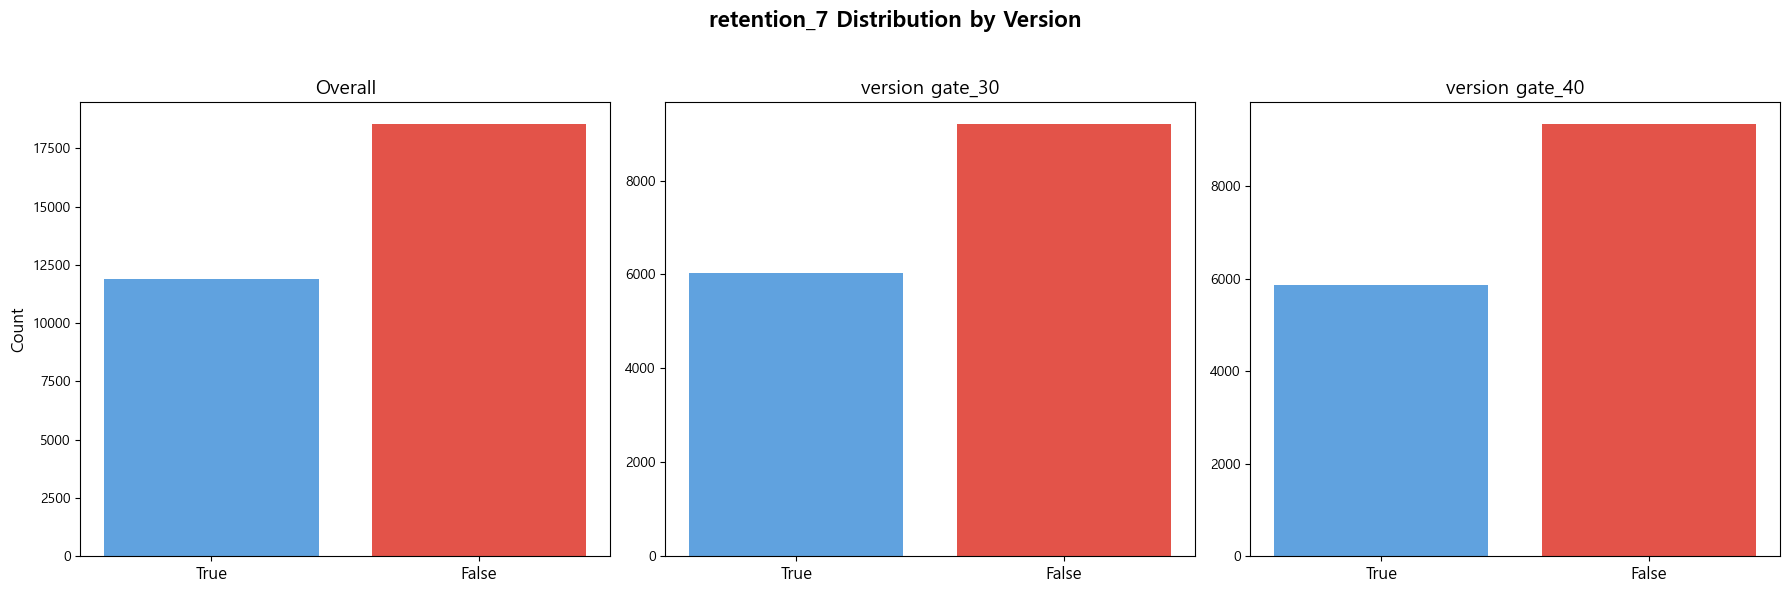

In [178]:
bar(df_preped, "retention_7")

-   **`retention_1`과 `retention_7`의 비율 상승**
    `sum_gamerounds` 값이 30 미만인 플레이어들을 제외시켰기 때문. 본 프로젝트에서는 gate 스테이지 변경의 영향을 비교하는 것이 주요 목표이므로 문제되지 않을 것으로 보임.
-   **`retention_1`**
    -   전처리 전: 두 버전간의 비율은 각각 44.8%와 44.2%로, gate_30이 높게 나타남.
    -   전처리 후: 두 버전간의 비율은 각각 78.8%와 78.7%로, 두 버전 간의 차이는 더 좁혀졌고, gate_40 그룹이 gate_30 그룹보다 약간 높게 나타나면서 역전함.
        gate_40 그룹이 미세하게 더 높은 유지율을 보였으며, <u>이는 첫 장벽의 위치 변경이 초기 유입 후 1일 유지율에 긍정적인 영향을 미칠 수 있다는 것을 시사.</u>
-   **`retention_7`**
    -   전처리 전: 두 버전간의 비율은 각각 19.0%와 18.2%로, gate_30이 높게 나타남.
    -   전처리 후: 두 버전간의 비율은 각각 39.5%와 38.5%로, 여전히 gate_30이 높게 나타났지만, 상대적인 차이는 줄었음.
        gate_30 그룹이 더 높은 유지율을 보였으며, <u>이는 첫 장벽의 위치 유지가 후속 유지율에 더 긍정적인 영향을 미칠 수 있다는 것을 시사.</u>


### `sum_gamerounds`


In [179]:
df_preped["sum_gamerounds"].describe()

count    30446.000000
mean        89.906556
std         61.266019
min         30.000000
25%         43.000000
50%         67.000000
75%        118.000000
max        292.000000
Name: sum_gamerounds, dtype: float64

In [180]:
df_preped[df_preped["version"] == "gate_30"]["sum_gamerounds"].describe()

count    15236.000000
mean        88.907915
std         61.362033
min         30.000000
25%         42.000000
50%         65.000000
75%        117.000000
max        292.000000
Name: sum_gamerounds, dtype: float64

In [181]:
df_preped[df_preped["version"] == "gate_40"]["sum_gamerounds"].describe()

count    15210.000000
mean        90.906903
std         61.155359
min         30.000000
25%         44.000000
50%         69.000000
75%        119.000000
max        292.000000
Name: sum_gamerounds, dtype: float64

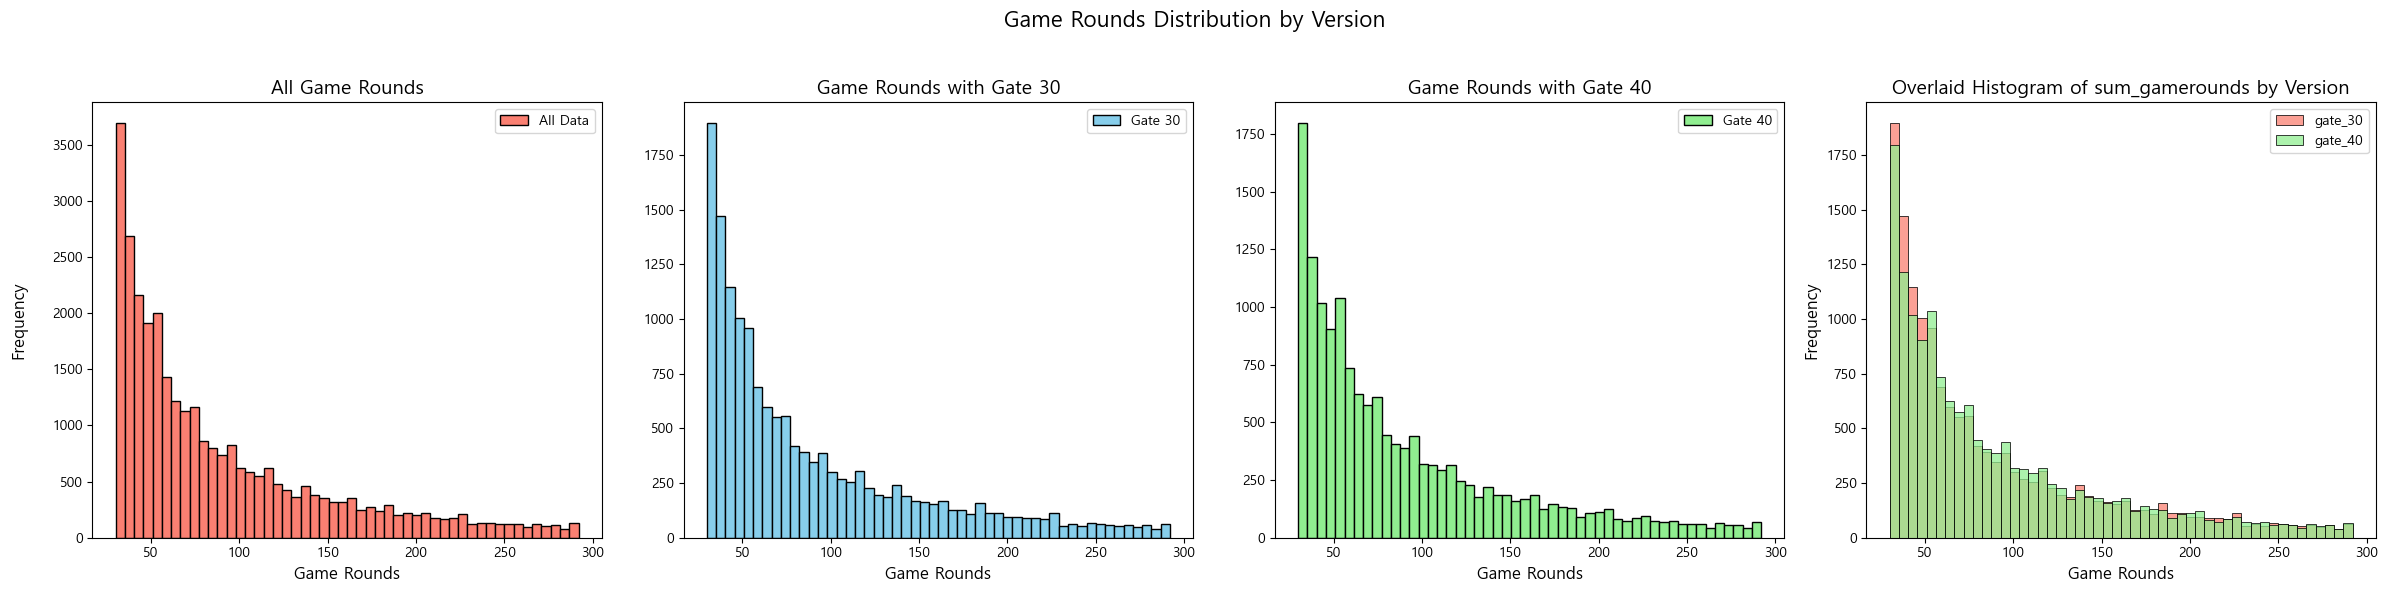

In [182]:
def hist_add_overlaid(df, bin=50, col="sum_gamerounds"):
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    fig.suptitle("Game Rounds Distribution by Version", fontsize=16)  # 전체 제목 설정

    # 전체 데이터 히스토그램
    axes[0].hist(
        df[col],
        bins=bin,
        color="salmon",
        edgecolor="black",
        label="All Data",
    )

    axes[0].set_title("All Game Rounds", fontsize=14)
    axes[0].set_xlabel("Game Rounds", fontsize=12)
    axes[0].set_ylabel("Frequency\n", fontsize=12)
    axes[0].legend()

    # gate_30 버전의 히스토그램
    axes[1].hist(
        df[df["version"] == "gate_30"][col],
        bins=bin,
        color="skyblue",
        edgecolor="black",
        label="Gate 30",
    )

    axes[1].set_title("Game Rounds with Gate 30", fontsize=14)
    axes[1].set_xlabel("Game Rounds", fontsize=12)
    axes[1].legend()

    # gate_40 버전의 히스토그램
    axes[2].hist(
        df[df["version"] == "gate_40"][col],
        bins=bin,
        color="lightgreen",
        edgecolor="black",
        label="Gate 40",
    )

    axes[2].set_title("Game Rounds with Gate 40", fontsize=14)
    axes[2].set_xlabel("Game Rounds", fontsize=12)
    axes[2].legend()

    # 오버레이 히스토그램
    sns.histplot(
        df[df["version"] == "gate_30"]["sum_gamerounds"],
        bins=bin,
        color="salmon",
        label="gate_30",
        ax=axes[3],
    )
    sns.histplot(
        df[df["version"] == "gate_40"]["sum_gamerounds"],
        bins=bin,
        color="lightgreen",
        label="gate_40",
        ax=axes[3],
    )
    axes[3].set_title("Overlaid Histogram of sum_gamerounds by Version", fontsize=14)
    axes[3].set_xlabel("Game Rounds", fontsize=12)
    axes[3].set_ylabel("Frequency", fontsize=12)
    axes[3].legend()

    #
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # 전체 제목과의 간격 확보
    plt.show()


hist_add_overlaid(df_preped)

-   전처리 후에는 두 그룹의 표준편차가 거의 동일해짐.

    <u>이는 데이터 정제 과정에서 극단값이나 이상치가 제거되었음을 시사.</u>

-   gate_40의 평균이 상대적으로 더 높게 나타남.

    <u>이는 전처리 과정에서 불규칙한 데이터나 극단값이 제거되면서, gate_40 그룹의 게임 라운드 수가 상대적으로 더 많았다는 것을 의미.</u>


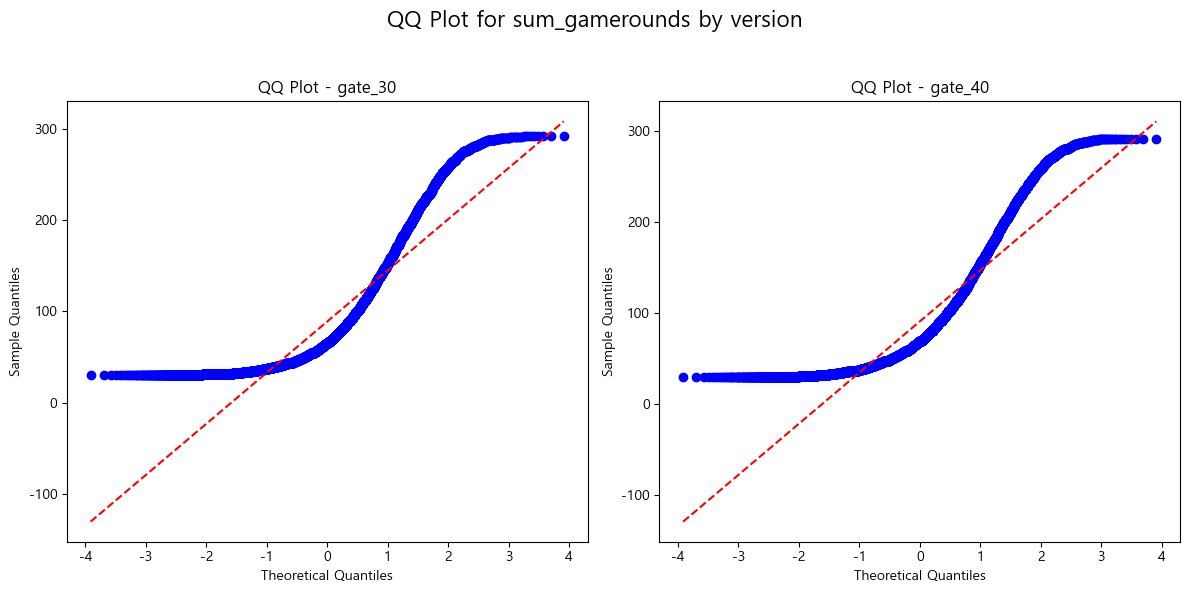

In [183]:
plot_qq_by_version(df_preped, "sum_gamerounds")

## A/B Test

A/B 테스팅은 두 그룹(A와 B) 간의 차이를 분석하여 특정 개입이 효과적인지를 통계적으로 검증하는 방법.

이번 분석에서는 두 그룹(gate_30 버전과 gate_40 버전) 간의 유의미한 차이를 확인하기 위해 비율 차이 검정(Proportion Z-Test)과 평균 차이 검정(Bootstrap)을 수행.


### `retention_1` & `retention_7`

두 그룹에서 특정 기간 동안 사용자가 유지되었는지 여부(retention_1 및 retention_7)를 기준으로 유지율에 대한 A/B 테스트를 진행.

이를 위해 Proportion Z-Test를 사용하여 두 그룹 간 유지율의 차이가 통계적으로 유의미한지 검정.


In [184]:
def perform_chi_square_test(
    data, group_column, outcome_column, significance_level=0.05
):
    contingency_table = pd.crosstab(data[group_column], data[outcome_column])
    chi2_stat, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)

    print(f"교차표:\n{contingency_table}\n")
    print(f"카이제곱 통계량: {chi2_stat:.4f}")
    print(f"p-값: {p_value:.4e}")
    print(f"자유도: {dof}")
    # print("기대값 테이블:")
    # print(expected_frequencies)

    print()
    if p_value < significance_level:
        print("결과: 유의미한 차이가 있습니다 (귀무가설 기각).")
    else:
        print("결과: 유의미한 차이가 없습니다 (귀무가설 채택).")

    # 결과 반환
    return {
        "chi2_statistic": chi2_stat,
        "p_value": p_value,
        "degrees_of_freedom": dof,
        "contingency_table": contingency_table,
        "expected_frequencies": expected_frequencies,
        "significant": p_value < significance_level,
    }


def plot_chi_square_comparison(observed, expected, col):
    observed_flat = np.array(observed).flatten()
    expected_flat = np.array(expected).flatten()

    x = np.arange(4)
    width = 0.4

    plt.bar(x - width / 2, observed_flat, width, label="Observed", color="#60a2df")
    plt.bar(x + width / 2, expected_flat, width, label="Expected", color="#e35349")
    plt.xticks(x, ["A, No", "A, Yes", "B, No", "B, Yes"])
    plt.ylabel("Frequency")
    plt.title(f"{col} Observed vs Expected Frequencies")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_chi_square_distribution(test_stat, col, dof=1, significance_level=0.05):
    x = np.linspace(0, 10, 500)
    y = chi2.pdf(x, dof)

    critical_value = chi2.ppf(1 - significance_level, dof)

    plt.plot(x, y, label="Chi-square Distribution", color="#60a2df")
    plt.axvline(
        critical_value,
        color="#e35349",
        linestyle="--",
        label=f"Critical Value ({critical_value:.2f})",
    )
    plt.axvline(
        test_stat,
        color="#6aa84f",
        linestyle="--",
        label=f"Test Statistic ({test_stat:.2f})",
    )

    plt.title(f"{col} Chi-square Test Visualization")
    plt.xlabel("Chi-square Value")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()

In [185]:
chi2_result_retention_1 = perform_chi_square_test(df_preped, "version", "retention_1")

교차표:
retention_1  False  True 
version                  
gate_30       3236  12000
gate_40       3221  11989

카이제곱 통계량: 0.0142
p-값: 9.0530e-01
자유도: 1

결과: 유의미한 차이가 없습니다 (귀무가설 채택).


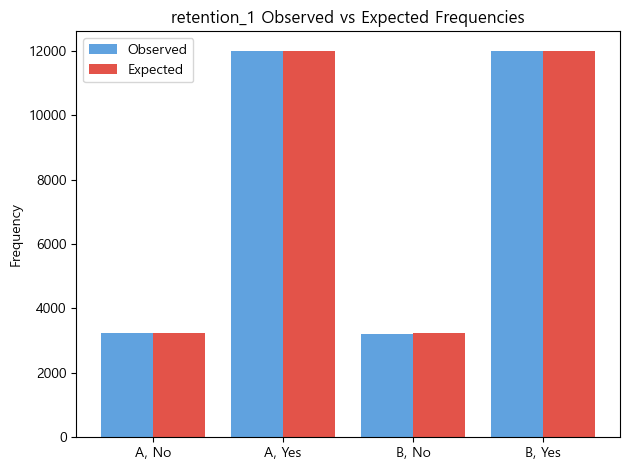

In [186]:
plot_chi_square_comparison(
    chi2_result_retention_1["contingency_table"],
    chi2_result_retention_1["expected_frequencies"],
    "retention_1",
)

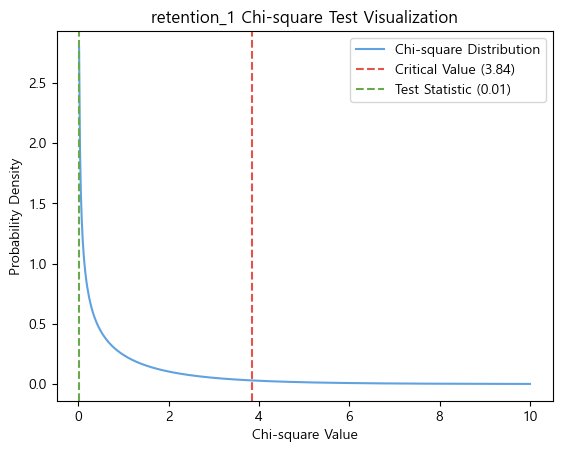

In [187]:
plot_chi_square_distribution(
    chi2_result_retention_1["chi2_statistic"],
    "retention_1",
    chi2_result_retention_1["degrees_of_freedom"],
)

In [188]:
chi2_result_retention_7 = perform_chi_square_test(df_preped, "version", "retention_7")

교차표:
retention_7  False  True 
version                  
gate_30       9205   6031
gate_40       9344   5866

카이제곱 통계량: 3.2652
p-값: 7.0763e-02
자유도: 1

결과: 유의미한 차이가 없습니다 (귀무가설 채택).


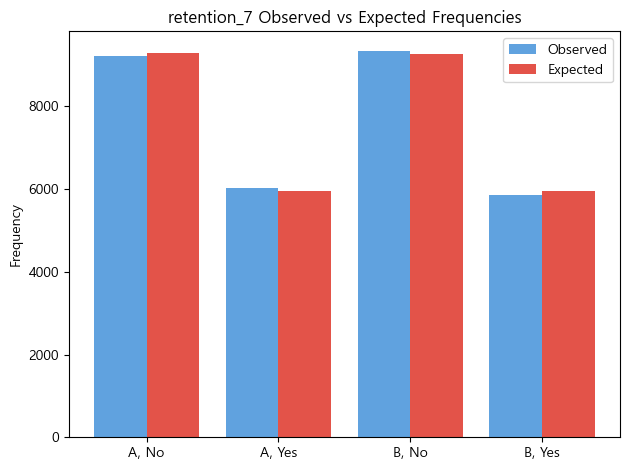

In [189]:
plot_chi_square_comparison(
    chi2_result_retention_7["contingency_table"],
    chi2_result_retention_7["expected_frequencies"],
    "retention_7",
)

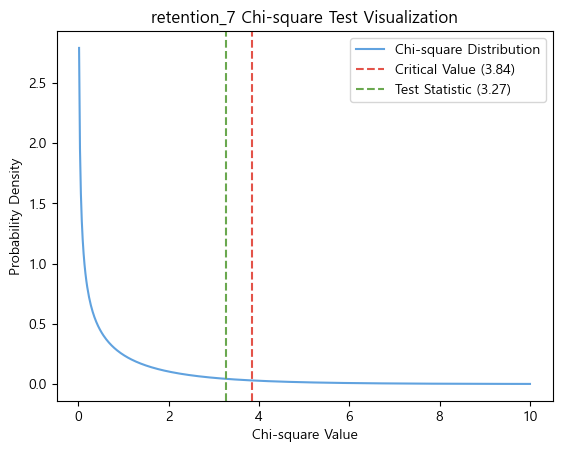

In [190]:
plot_chi_square_distribution(
    chi2_result_retention_7["chi2_statistic"],
    "retention_7",
    chi2_result_retention_7["degrees_of_freedom"],
)

### `sum_gamerounds`

사용자의 게임 라운드 총합(sum_gamerounds)에 대한 A/B 테스트는 두 그룹의 평균 차이를 비교하기 위해 Bootstrap 방법을 사용했습니다.

부트스트래핑은 데이터 재표본화를 통해 신뢰 구간(Confidence Interval)을 계산하여 차이가 유의미한지 확인하는 데 사용됩니다.


In [191]:
df_A = df_preped[df_preped["version"] == "gate_30"]
df_B = df_preped[df_preped["version"] == "gate_40"]
data_A = df_A["sum_gamerounds"].values
data_B = df_B["sum_gamerounds"].values

In [192]:
from contextlib import contextmanager


@contextmanager
def with_seed(seed=42):
    original_state = np.random.get_state()
    np.random.seed(seed)
    try:
        yield
    finally:
        np.random.set_state(original_state)


def resample_data(data, n_resamples, seed=None):

    def _resample_data():
        return [
            np.random.choice(data, size=len(data), replace=True)
            for _ in range(n_resamples)
        ]

    if seed is not None:
        with with_seed(seed):
            return _resample_data()
    else:
        return _resample_data()


n_resamples = 10000
seed = 42
resampled_data_A = resample_data(data_A, n_resamples, seed)
resampled_data_B = resample_data(data_B, n_resamples, seed)

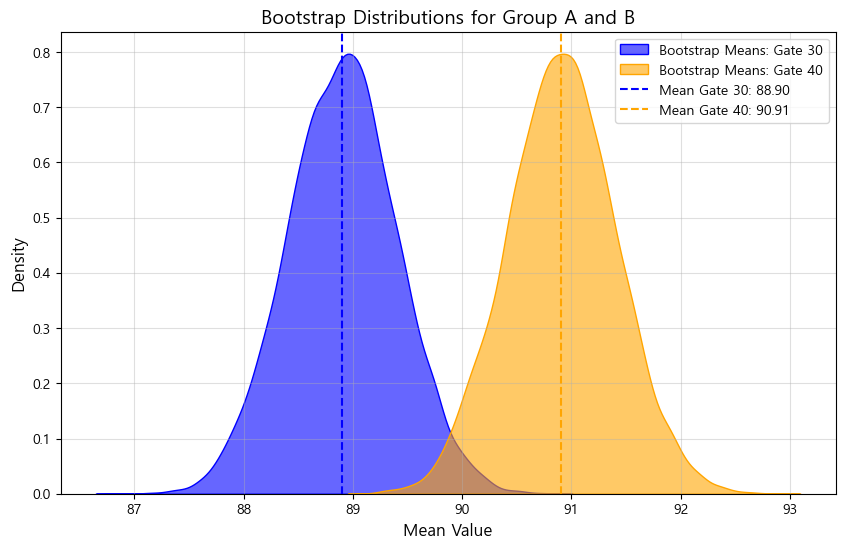

In [193]:
def Bootstrap_Distributions(data_A, data_B):

    resampled_means_A = np.mean(data_A, axis=1)
    resampled_means_B = np.mean(data_B, axis=1)

    plt.figure(figsize=(10, 6))

    sns.kdeplot(
        resampled_means_A,
        fill=True,
        color="blue",
        alpha=0.6,
        label="Bootstrap Means: Gate 30",
    )
    sns.kdeplot(
        resampled_means_B,
        fill=True,
        color="orange",
        alpha=0.6,
        label="Bootstrap Means: Gate 40",
    )

    plt.axvline(
        np.mean(data_A),
        color="blue",
        linestyle="--",
        label=f"Mean Gate 30: {np.mean(data_A):.2f}",
    )
    plt.axvline(
        np.mean(data_B),
        color="orange",
        linestyle="--",
        label=f"Mean Gate 40: {np.mean(data_B):.2f}",
    )

    plt.title("Bootstrap Distributions for Group A and B", fontsize=14)
    plt.xlabel("Mean Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.4)
    plt.show()


Bootstrap_Distributions(resampled_data_A, resampled_data_B)

부트스트랩 분포를 보았을 때, Gate 40 버전이 더 많은 게임 라운드를 플레이한 것으로 보인다. 

In [194]:
def calculate_statistic(resampled_a, resampled_b, stat_func):
    return [stat_func(a, b) for a, b in zip(resampled_a, resampled_b)]


def compute_confidence_interval(statistics, confidence_level=0.95):
    alpha = 1 - confidence_level
    lower_bound = np.percentile(statistics, alpha / 2 * 100)
    upper_bound = np.percentile(statistics, (1 - alpha / 2) * 100)
    return lower_bound, upper_bound


def bootstrap_confidence_interval(
    resampled_data_a,
    resampled_data_b,
    stat_func,
    confidence_level=0.95,
):
    statistics = calculate_statistic(resampled_data_a, resampled_data_b, stat_func)

    return statistics, compute_confidence_interval(statistics, confidence_level)


def mean_difference(data_a, data_b):
    return np.mean(data_a) - np.mean(data_b)


bootstrap_distribution, (lower_bound, upper_bound) = bootstrap_confidence_interval(
    resampled_data_A, resampled_data_B, mean_difference
)

mean_bootstrap_diff = np.mean(bootstrap_distribution)
print(f"Bootstrap Mean Difference: {mean_bootstrap_diff}")
print(f"Confidence Interval: ({lower_bound}, {upper_bound})")

Bootstrap Mean Difference: -2.0060531043098555
Confidence Interval: (-3.371059770718469, -0.6504246605542906)


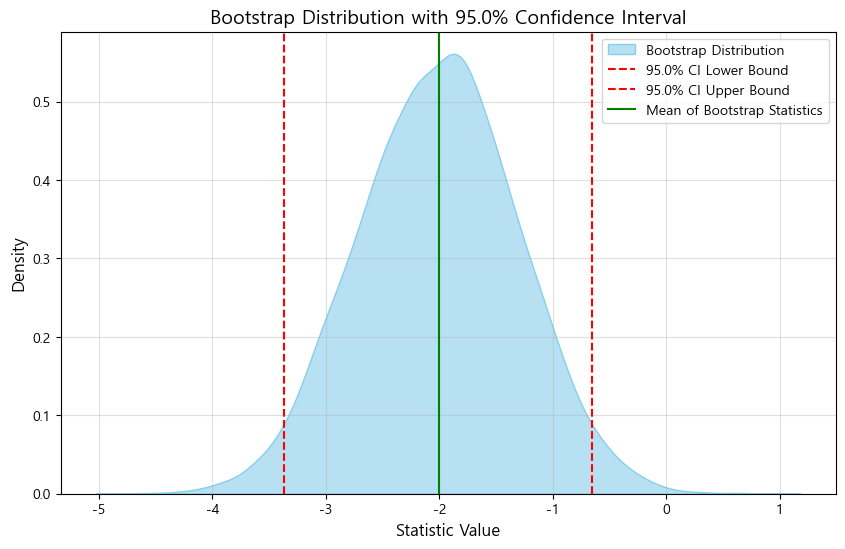

In [195]:
def plot_bootstrap_distribution(statistics, confidence_level=0.95):
    # 부트스트랩 통계량 분포 시각화
    plt.figure(figsize=(10, 6))

    # KDE 플롯 생성
    sns.kdeplot(
        statistics,
        fill=True,
        color="skyblue",
        alpha=0.6,
        label="Bootstrap Distribution",
    )

    # 신뢰구간 표시
    lower_bound, upper_bound = np.percentile(
        statistics, [(1 - confidence_level) / 2 * 100, (1 + confidence_level) / 2 * 100]
    )
    plt.axvline(
        lower_bound,
        color="red",
        linestyle="--",
        label=f"{confidence_level*100}% CI Lower Bound",
    )
    plt.axvline(
        upper_bound,
        color="red",
        linestyle="--",
        label=f"{confidence_level*100}% CI Upper Bound",
    )

    # 평균값 표시
    plt.axvline(
        np.mean(statistics),
        color="green",
        linestyle="-",
        label="Mean of Bootstrap Statistics",
    )

    # 그래프 꾸미기
    plt.title(
        f"Bootstrap Distribution with {confidence_level*100}% Confidence Interval",
        fontsize=14,
    )
    plt.xlabel("Statistic Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.4)
    plt.show()


plot_bootstrap_distribution(bootstrap_distribution)

두 버전 간의 평균 차이는 약 $-2.006$. 이는 **gate_40 그룹의 유저가 더 많은 게임 라운드를 플레이 했음을 의미.** 

신뢰구간에서 $-3.371$에서 $-0.650$ 사이에 있을 가능성이 95%을 나타내는데, 0이 포함되지 않으므로 평균의 차이가 통계적으로 유의미하나도 결론 내릴 수 있음.

## 프로젝트 결과

- **유저 유지율 (Retention) 분석**
    - 1일 유지율: Gate 30과 Gate 40 간 통계적으로 유의미한 차이가 없음 (p-value = 0.9053)
    - 7일 유지율: Gate 40에서 약간의 차이가 있으나, 통계적으로 유의미하지 않음 (p-value = 0.0707)
- **게임 라운드 (Game Rounds) 분석**
    - Gate 40 버전 유저들이 평균적으로 더 많은 게임 라운드를 플레이 (평균 차이: -2.006)
    - 95% 신뢰구간이 0을 포함하지 않아 통계적으로 유의미한 차이를 보임
- **최종 결론 및 권장사항**
    - Gate 위치를 레벨 40으로 이동하는 것이 게임 참여도 향상에 긍정적
    - 유저 유지율에 부정적 영향이 없으므로 Gate 40 버전 채택 권장